In [39]:
import numpy as np
import matplotlib.pyplot as plt

def lu_factorization(A):
    """
    Perform LU factorization of a matrix A.
    
    Parameters:
    A (ndarray): The matrix to be factorized.
    
    Returns:
    L (ndarray): Lower triangular matrix.
    U (ndarray): Upper triangular matrix.
    """
    n = A.shape[0]
    L = np.eye(n)
    U = np.copy(A)

    for k in range(n-1):
        if U[k, k] == 0:
            raise ValueError("No pivot at A[{k}, {k}].")
        m_k = U[k:, k] / U[k, k]
        L[k:, k] = m_k

        E_k = np.eye(n)
        E_k[k+1:, k] = -m_k[1:]
        U = E_k @ U

    return L, U


def lu_solve(A, b):
    """
    Solve the system of equations Ax = b using LU factorization.
    
    Parameters:
    A (ndarray): The matrix A.
    b (ndarray): The right-hand side vector.
    
    Returns:
    x (ndarray): The solution vector.
    """
    L, U = lu_factorization(A)
    
    # Solve Ly = b
    y = np.linalg.solve(L, b)
    
    # Solve Ux = y
    x = np.linalg.solve(U, y)
    
    return x


A = np.array([
    [1, 2, 2],
    [4, 4, 2],
    [4, 6, 4]
])
L, U = lu_factorization(A)
print("Matrix A:")
print(A)
print("Lower triangular matrix L:")
print(L)
print("Upper triangular matrix U:")
print(U)

Matrix A:
[[1 2 2]
 [4 4 2]
 [4 6 4]]
Lower triangular matrix L:
[[1.  0.  0. ]
 [4.  1.  0. ]
 [4.  0.5 1. ]]
Upper triangular matrix U:
[[ 1.  2.  2.]
 [ 0. -4. -6.]
 [ 0.  0. -1.]]


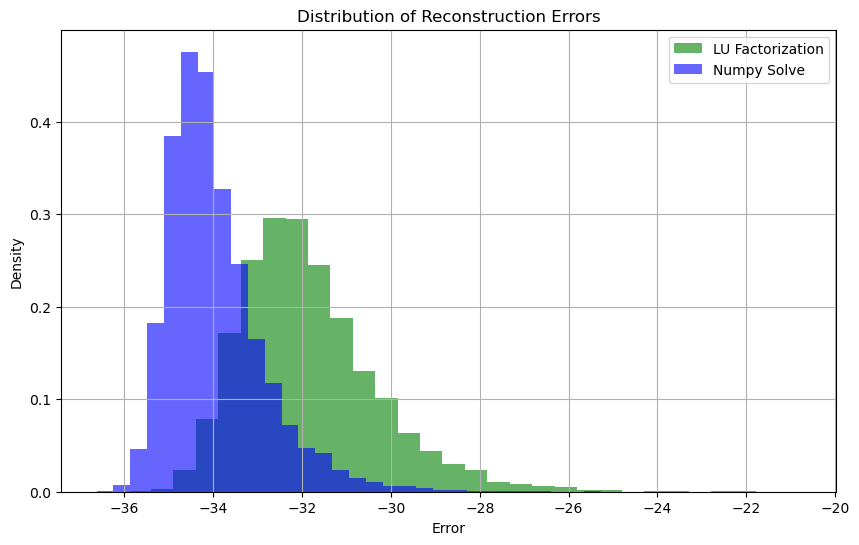

In [42]:
# Test the numerical stability of the LU factorization
trials = 10000
np.random.seed(0)

lu_errors = []
linalg_errors = []

for _ in range(trials):
    # Generate a random matrix
    n = 10
    A = np.random.rand(n, n) * 2 - 1

    # Generate a random solution
    x = np.random.rand(n) * 2 - 1

    # Compute the right-hand side
    b = A @ x

    # Solve using LU factorization
    x_hat = lu_solve(A, b)

    # Compute the error
    lu_error = np.linalg.norm(x - x_hat)
    lu_errors.append(np.log(lu_error))

    # Solve using numpy's built-in solver
    x_linalg = np.linalg.solve(A, b)
    linalg_error = np.linalg.norm(x - x_linalg)
    linalg_errors.append(np.log(linalg_error))

# Plot the distribution of errors
plt.figure(figsize=(10, 6))
plt.hist(lu_errors, bins=30, density=True, alpha=0.6, color='g', label='LU Factorization')
plt.hist(linalg_errors, bins=30, density=True, alpha=0.6, color='b', label='Numpy Solve')
plt.legend()
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Error')
plt.ylabel('Density')
plt.grid()
plt.show()